
# Project: Investigate a Dataset Gapminder Health

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
# Importing pandas , numpy , matplotlib , seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## <>Data Wrangling<>


### General Properties

In [3]:
# Loading the data % inspecting the data
#  look for missing or possible errant data
Child_Mortality = pd.read_csv(r'child_mortality_0_5_year_olds_dying_per_1000_born.csv')
Child_per_Woman = pd.read_csv(r'children_per_woman_total_fertility.csv')
Literacy = pd.read_csv('literacy_rate_youth_total_percent_of_people_ages_15_24.csv')
dfes = [Child_Mortality, Child_per_Woman,Literacy]
literacy.head(3)

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,0.301,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.988,NaN,NaN,0.988
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.901,NaN,NaN,NaN,0.918,NaN,NaN,NaN,NaN,NaN


 
### Data Cleaning and organizing

In [65]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
literacy_n = pd.melt(literacy, ['country'],
                     var_name = 'year', value_name ='literacy_rate').sort_values(by =['country', 'year']).reset_index(drop=True)
literacy_n.head()

,country,year,literacy_rate
0,Afghanistan,1975,NaN
1,Afghanistan,1976,NaN
2,Afghanistan,1977,NaN
3,Afghanistan,1978,NaN
4,Afghanistan,1979,0.301


In [66]:
Child_per_woman_n = pd.melt(Child_per_woman, ['country'],
                     var_name = 'year', value_name ='Child_per_woman').sort_values(by =['country', 'year']).reset_index(drop=True)
Child_per_woman_n.head()
                          

,country,year,Child_per_woman
0,Afghanistan,1800,7.0
1,Afghanistan,1801,7.0
2,Afghanistan,1802,7.0
3,Afghanistan,1803,7.0
4,Afghanistan,1804,7.0


In [67]:
child_mortality_n = pd.melt(child_mortality, ['country'],
                     var_name = 'year', value_name ='child_mortality').sort_values(by =['country', 'year']).reset_index(drop=True)
child_mortality_n.head()

,country,year,child_mortality
0,Afghanistan,1800,469.0
1,Afghanistan,1801,469.0
2,Afghanistan,1802,469.0
3,Afghanistan,1803,469.0
4,Afghanistan,1804,469.0


In [68]:
# we willl merge the individual dataframes into one Health dataframe
dfs_n = [literacy_n, Child_per_woman_n , child_mortality_n]
def merge_dfs (list_dfs):
    i=0
    for df in list_dfs:
        if i == 0:
            final = df
        else:
            final = pd.merge(final, df, how = 'inner', on = ['country', 'year'])
        i += 1
    final = final.sort_values(by = ['country', 'year']).reset_index(drop = True)
    return final

In [69]:
health = merge_dfs(dfs_n)

health.head()

,country,year,literacy_rate,Child_per_woman,child_mortality
0,Afghanistan,1975,NaN,7.45,275.0
1,Afghanistan,1976,NaN,7.45,269.0
2,Afghanistan,1977,NaN,7.45,263.0
3,Afghanistan,1978,NaN,7.45,257.0
4,Afghanistan,1979,0.301,7.45,250.0


In [70]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476 entries, 0 to 5475
Data columns (total 5 columns):
country            5476 non-null object
year               5476 non-null object
literacy_rate      551 non-null float64
Child_per_woman    5476 non-null float64
child_mortality    5476 non-null float64
dtypes: float64(3), object(2)
memory usage: 214.0+ KB


In [71]:
#to convert year column into datetime object

health['year'] = pd.to_datetime(health.year, format = '%Y')

In [72]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476 entries, 0 to 5475
Data columns (total 5 columns):
country            5476 non-null object
year               5476 non-null datetime64[ns]
literacy_rate      551 non-null float64
Child_per_woman    5476 non-null float64
child_mortality    5476 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 214.0+ KB


In [73]:
health.describe()

,literacy_rate,Child_per_woman,child_mortality
count,551.000000,5476.000000,5476.000000
mean,0.860541,4.151609,80.796085
std,0.189851,1.925375,69.841687
min,0.140000,1.140000,2.790000
25%,0.797000,2.410000,23.400000
50%,0.957000,3.985000,57.750000
75%,0.988000,5.840000,121.000000
max,1.000000,8.870000,338.000000


In [74]:
sum(health.duplicated())

0

In [75]:
health.isnull().any()

country            False
year               False
literacy_rate       True
Child_per_woman    False
child_mortality    False
dtype: bool

In [76]:
health['literacy_rate'].fillna((health['literacy_rate'].mean()), inplace=True)

In [77]:
health.head()

,country,year,literacy_rate,Child_per_woman,child_mortality
0,Afghanistan,1975-01-01,0.860541,7.45,275.0
1,Afghanistan,1976-01-01,0.860541,7.45,269.0
2,Afghanistan,1977-01-01,0.860541,7.45,263.0
3,Afghanistan,1978-01-01,0.860541,7.45,257.0
4,Afghanistan,1979-01-01,0.301000,7.45,250.0


In [78]:
health.to_csv('data-health.csv', index = None)

##### Summary of Cleaning processes

Now that my data is cleaned, 
l've made the following changes:

#### 1-Organizing the data of child_mortality,Child_per_woman and literacy into columuns of country and year and the rate of them.

####  2- standardize year column into datetime format.

####  3- I've merged all the three dataframes into one dataframe which is called 'health'

####  4- I have replaced the missing values in literacy column with mean value

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Lets see how each of the mean metrics has changed, world over, throughout our range of years. Which have increased or decreased!)

In [79]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df = pd.read_csv('data-health.csv')
df.head()

,country,year,literacy_rate,Child_per_woman,child_mortality
0,Afghanistan,1975-01-01,0.860541,7.45,275.0
1,Afghanistan,1976-01-01,0.860541,7.45,269.0
2,Afghanistan,1977-01-01,0.860541,7.45,263.0
3,Afghanistan,1978-01-01,0.860541,7.45,257.0
4,Afghanistan,1979-01-01,0.301000,7.45,250.0


In [80]:
df_grouped_by_year = df.drop(columns = ['country'], axis = 'columns').groupby('year').mean()
df_grouped_by_year

,literacy_rate,Child_per_woman,child_mortality
year,,,
1975-01-01,0.850141,5.340338,129.895270
1976-01-01,0.850563,5.281622,126.070270
1977-01-01,0.860510,5.222905,122.316892
1978-01-01,0.859189,5.167027,118.556757
1979-01-01,0.845826,5.113851,114.833108
1980-01-01,0.860759,5.058649,111.177703
1981-01-01,0.852600,5.007905,107.662162
1982-01-01,0.857184,4.952162,104.285135
1983-01-01,0.861311,4.893919,101.160135


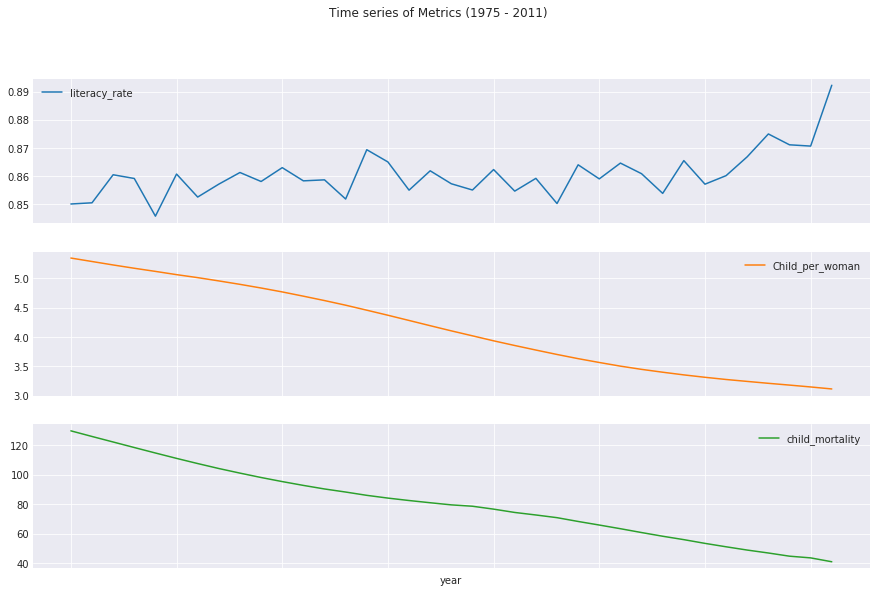

In [81]:
df_grouped_by_year.plot(figsize = (15,10),subplots = True, title = 'Time series of Metrics (1975 - 2011)');

   Incremental trends:

       Literacy Rate
        
   Decremental trends:
        
        Children per Woman_total fertility
        
        Child_Mortality_0-5_year_olds_dying_per_1000_born

        

   The trends look to be intuitive. The decrease in Child_Mortality_0-5_year_olds_dying_per_1000_born could be explained by the advancement of health system and awareness and also the decrease in the number children per woman
 
 This requires further investigation.

   The fluctuations in the Literacy Rate most likely result from absence of data for the Literacy metric



### Research Question 2  (Lets investigate country Literacy Rates. Which countries have the highest or lowest literacy rates ever recorded (in range of years 1975 - 2011)?!)

In [82]:
# separate the bottom and top 25 countries by literacy rate
top_25_literate_countries_2011 = df.groupby('country').max()['literacy_rate'].sort_values(ascending = False)[:25]
bottom_25_literate_countries_2011 = df.groupby('country').max()['literacy_rate'].sort_values(ascending = True)[:25]




# select color palette
pal_top = sns.color_palette("Greens_r", len(top_25_literate_countries_2011))
pal_bottom = sns.color_palette("Reds_r", len(bottom_25_literate_countries_2011))


# define function to rank the percentage values
def rankmin(x):
    u, inv, counts = np.unique(x, return_inverse=True, return_counts=True)
    csum = np.zeros_like(counts)
    csum[1:] = counts[:-1].cumsum()
    return csum[inv]

# calculate the rank for each percentage value
rank = rankmin(bottom_25_literate_countries_2011)

ticks = np.arange(0, 1 + .1, 0.1)

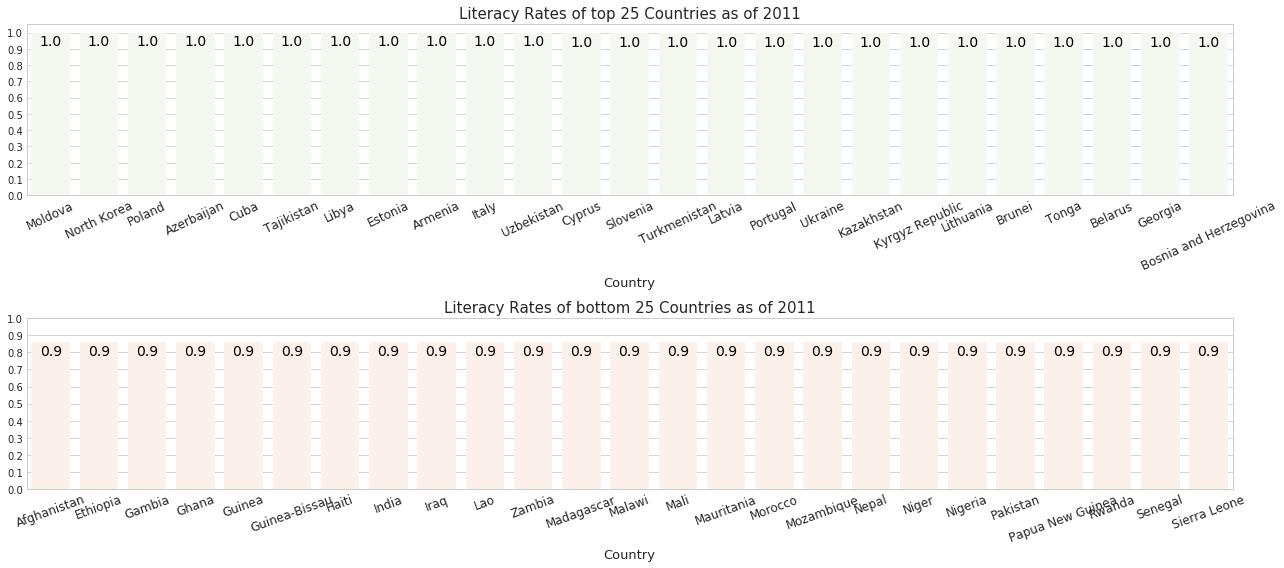

In [83]:
# plot
plt.figure(figsize = (18, 8))
sns.set_style("whitegrid")

#=========================================plot for top 25 countries========================================================

plt.subplot(2, 1, 1)
splot = sns.barplot(top_25_literate_countries_2011.index, top_25_literate_countries_2011.values, 
                    palette=np.array(pal_top[::-1])[rank])


# annotate the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -9), textcoords = 'offset points', color = 'black',
                  fontsize = 14)


# labeling
plt.title('Literacy Rates of top 25 Countries as of 2011', fontsize = 15)
plt.xlabel('Country', fontsize = 13)
plt.xticks(rotation = 25, fontsize = 12)
plt.yticks(ticks, ticks)

#======================================plot for bottom 25 countries========================================================
plt.subplot(2, 1, 2)
splot = sns.barplot(bottom_25_literate_countries_2011.index, bottom_25_literate_countries_2011.values, 
                    palette=np.array(pal_bottom[::-1])[rank])


# annotate the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -9), textcoords = 'offset points', color = 'black',
                   fontsize = 14)
    

#labeling 
plt.title('Literacy Rates of bottom 25 Countries as of 2011', fontsize = 15)
plt.xlabel('Country', fontsize = 13)
plt.xticks(rotation = 20, fontsize = 12)
plt.yticks(ticks, ticks)

plt.tight_layout()

It's clear to see Moldova,North Korea and Azerbaijan share the highest literacy rate ever recorded (range: 1975 - 2011) while countries like Afghanistan, Niger,Burkina Faso and Mali lie at the bottom end of the spectrum.

# Lets examine the relationship between the metrics for the latest year - 2011 in the dataset. It makes sense for Children mortality to have a negative correlation with Literacy rate. Lets see what the data has to say.

In [84]:
df['yearOnly']=pd.to_datetime(df['year']).dt.year.astype(int)

df1 = df.groupby(['country', 'year']).max().query('yearOnly == 2011')
df1

,,literacy_rate,Child_per_woman,child_mortality,yearOnly
country,year,,,,
Afghanistan,2011-01-01,0.860541,5.60,84.10,2011
Albania,2011-01-01,0.988000,1.67,12.30,2011
Algeria,2011-01-01,0.860541,2.93,26.70,2011
Angola,2011-01-01,0.730000,6.08,113.00,2011
Argentina,2011-01-01,0.992000,2.36,13.90,2011
Armenia,2011-01-01,0.998000,1.50,17.60,2011
Azerbaijan,2011-01-01,0.860541,2.01,35.10,2011
Bahrain,2011-01-01,0.860541,2.12,8.23,2011
Bangladesh,2011-01-01,0.787000,2.24,46.20,2011


first we will try to answer our questions, let's look at the distribution of both the metrics

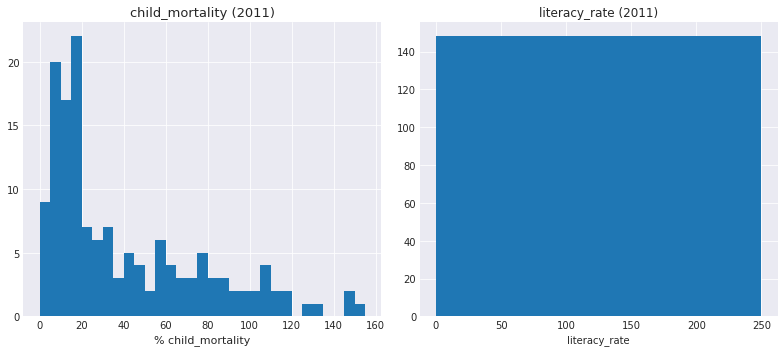

In [85]:
sns.set_style("darkgrid")
plt.figure(figsize = (11, 5))

bins = np.arange(0, df1.child_mortality.max() + 6, 5)
plt.subplot(1, 2, 1)
plt.hist(data = df1, x = 'child_mortality', bins = bins)
plt.title('child_mortality (2011)', fontsize = 13)
plt.xlabel('% child_mortality', fontsize = 11)


bins = np.arange(0, df1.literacy_rate.max() + 250, 250)
plt.subplot(1, 2, 2)
plt.hist(data = df1, x = 'literacy_rate', bins = bins)
plt.title('literacy_rate (2011)')
plt.xlabel('literacy_rate', fontsize = 10)
plt.tight_layout();



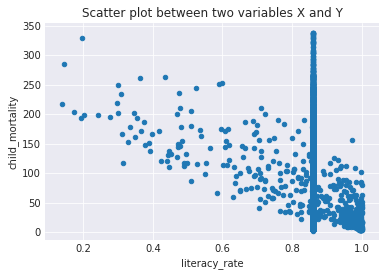

In [86]:
dataFrame = pd.DataFrame(data=health, columns=['literacy_rate','child_mortality']);

 

# Draw a scatter plot

dataFrame.plot.scatter(x='literacy_rate', y='child_mortality', title= "Scatter plot between two variables X and Y");

### <a id='conclusions'></a>
## Conclusions

>## Results:

>Our data suggest that

  > 1- The metrics Literacy Rate shows a consistently increasing trend while others such as Child_mortality_0_5_year_olds_dying_per_1000_born and Children_per_woman_total_fertility  have been decreasing.
  
  > 2-The decrease in Child_mortality_0_5_year_olds_dying_per_1000_born can be explained by the advancement of health and medical services and the increase in the literacy rate. But, more investigation is needed to ascertain this.
  
 >3-It's clear to see Moldova,North Korea and Azerbaijan share the highest literacy rate ever recorded (range: 1975 - 2011) while countries like Afghanistan, Niger,Burkina Faso and Mali lie at the bottom end of the spectrum. 
  
  >## Limitations:
  There are a couple of limitations with our data:
  
  >1- There may be other countries having higher / lower rates which weren't highlighted by the dataset due to a large number of *missing values.
  
  >2-The statistics that used here are descriptive statistics,not inferential, meaning that I did not create any hypotheses or controlled experiments or inferences with my data.

 
  

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the File > Download as submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0